# PRJNA856091 - Agrawal et. al

Articl link: https://doi.org/10.1093/femsmc/xtad006

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(
    here("data", "processed",
        "PRJNA856091_processed.csv.gz")
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<lgl>
1,10386,+10387.T,ins:10387:1,0.171705860,5358,920,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
2,10590,+10591.T,ins:10591:1,0.010989011,1183,13,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
3,10599,+10600.T,ins:10600:1,0.002601908,1153,3,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
4,10613,+10614.A,ins:10614:1,0.014705882,68,1,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
5,10832,+10833.T,ins:10833:1,0.087938685,7437,654,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
6,10965,+10966.A,ins:10966:1,0.053115016,5008,266,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA


In [3]:
lineages_in_paper <- c("B.1.1.7", "B.1.351", "B.1.427", "B.1.429",
    "B.1.617.2", "P.1", "B.1.1.529")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   7 104

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


Warning message in remove_identical_lineages(data, annihilate):
"Lineages lin_B.1.429, lin_B.1.427 are duplicates of eachother"


   user  system elapsed 
  7.997   0.153   8.226 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<lgl>
1,9.155277e-01,NA,NA,B.1.1.529,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
2,1.413075e-04,NA,NA,B.1.1.7,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
3,4.023655e-03,NA,NA,P.1,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
4,9.789945e-10,NA,NA,B.1.427,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
5,5.167651e-02,NA,NA,B.1.351,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA
6,7.357866e-03,NA,NA,B.1.617.2,SRR19994935,2022-02-01,FRS_2022-02-01,148,450415266,PRJNA856091,FRS,NA


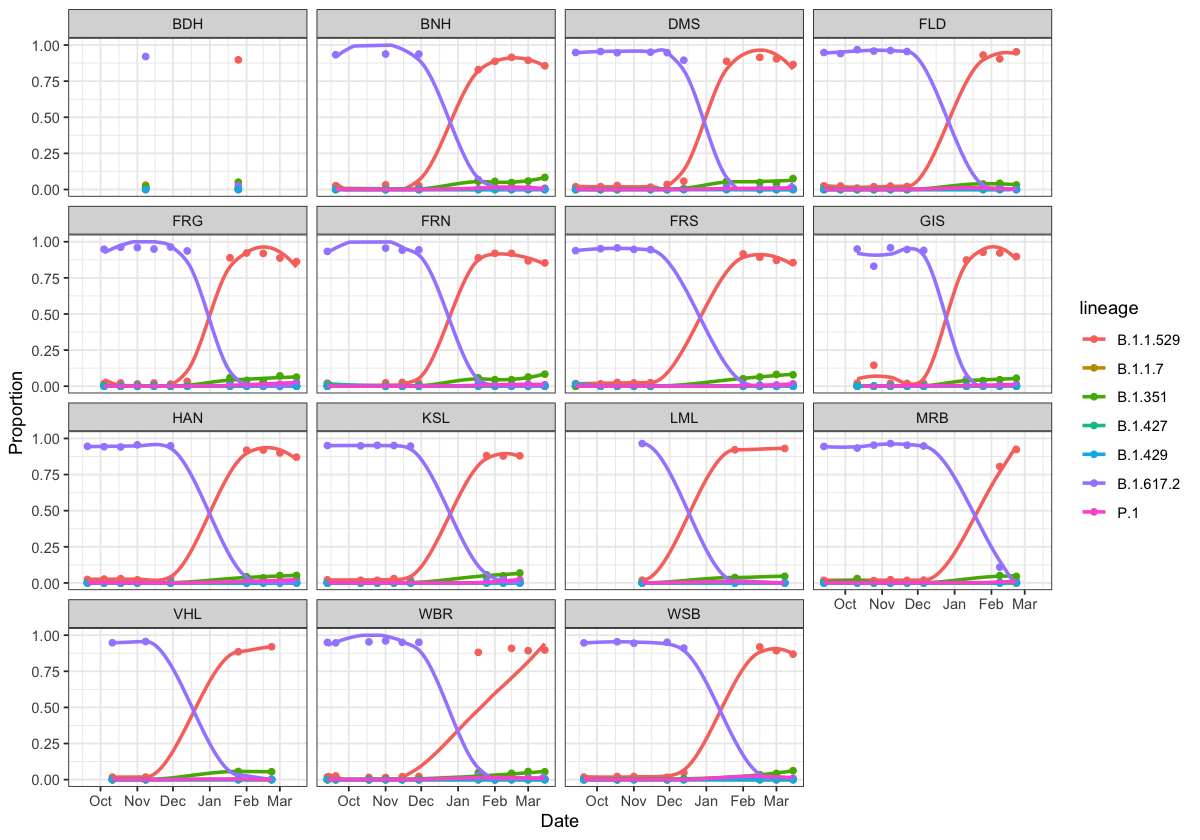

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))


These plots almost perfectly match what they show in the paper! The paper claims that there's some spatial variation, but this is hard to see with the lack of sampling during the transition from Delta to Omicron. 